In [1]:
cd /Users/liangqiaohao/Downloads/PV Lab/2020/March/Learning project/3D printing

/Users/liangqiaohao/Downloads/PV Lab/2020/March/Learning project/3D printing


In [2]:
import numpy as np
import torch
import math
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import GPyOpt
import GPy

import os

import matplotlib as mpl
import matplotlib.tri as tri

import ternary
import pickle
import datetime

from collections import Counter
import matplotlib.ticker as ticker

import pyDOE
import random
from scipy.stats import norm

from sklearn.ensemble import RandomForestRegressor

In [3]:
dataset = pd.read_csv(r'/Users/Liangqiaohao/Downloads/PV Lab/2020/March/Learning project/Secondary Data.csv')

X = dataset.iloc[:,0:8]
X

,Domain,N,n_de_ALM = 0.80,n_all_ALM = 0.80,ratio_all,n_any_ALM = 1,EF,AF
0,AM: Cross barrel,600,NaN,35,5.8,4,15.7,15.1
1,P3HT CNT,178,NaN,35,19.7,10,4.0,4.1
2,Ag-NanoP,164,NaN,20,12.2,12,4.1,4.2
3,AM: ARES,100,NaN,25,25.0,12,2.7,2.5
4,Perovskite,94,NaN,30,31.9,11,1.8,1.7


In [4]:
plotting_data = X[['ratio_all', 'EF', 'AF']].values
plotting_data

array([[ 5.8, 15.7, 15.1],
       [19.7,  4. ,  4.1],
       [12.2,  4.1,  4.2],
       [25. ,  2.7,  2.5],
       [31.9,  1.8,  1.7]])

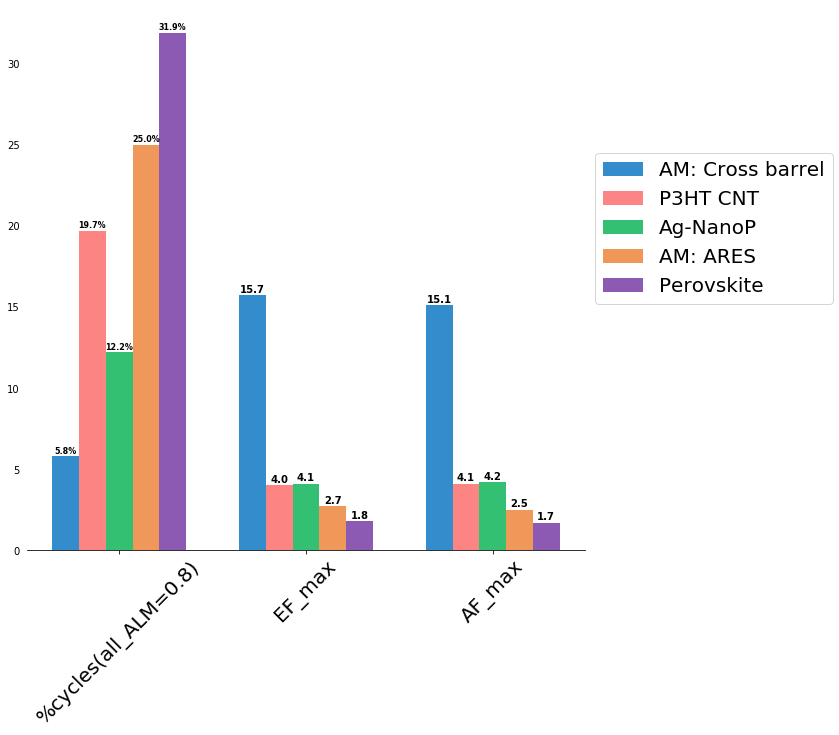

In [10]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

dataset_names = ['AM: Cross barrel','P3HT CNT', 'Ag-NanoP', 'AM: ARES','Perovskite',]
x = np.array([3,6,9])
width = 0.43
colors = ['#0070c0','#fc6766','#00b150','#ed7d31', '#7031a0']

for i in np.arange(len(dataset_names)):
    name = dataset_names[i]
    values = plotting_data.T[:,i]
    rects1 = ax.bar(x-width*(2-i), values,  width, alpha = 0.8, capsize = 5, label = name, color = colors[i])
    
    for j in np.arange(len(rects1)):
            rect = rects1[j]
            height = rect.get_height()
            if j == 0:
                ax.text(rect.get_x() + rect.get_width()/2., height + 0.05, str(values[j]) +'%',ha='center', va='bottom', fontsize = 8, weight = 'bold')
            else:
                ax.text(rect.get_x() + rect.get_width()/2., height + 0.05, str(values[j]),ha='center', va='bottom', weight = 'bold')



# Add some text for labels, title and custom x-axis tick labels, etc.


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False)
ax.xaxis.set_ticks_position('bottom')

# ax.set_title('Iterations by Regression Methods', fontsize = 20)
ax.set_xticks(x)
plt.xticks(rotation = 45)
# ax.set_ylim(0, 17)
# plt.yticks(fontsize = 20)
ax.set_xticklabels(['%cycles(all_ALM=0.8)', 'EF_max', 'AF_max'], fontsize = 20)
ax.legend(fontsize = 20, loc='upper left', bbox_to_anchor= (1.0, 0.75))




plt.show()